<a href="https://colab.research.google.com/github/Pavinithan1998/promptEngineering_Langchain/blob/main/prepare_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain tiktoken matplotlib seaborn tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.4/969.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.1 MB/s eta 0:00:00


In [2]:
!wget -r -A.html -P rtdocs https://python.langchain.com/en/latest/

Streaming output truncated to the last 5000 lines.
2023-06-02 05:07:23 (190 MB/s) - ‘rtdocs/python.langchain.com/en/latest/integrations/bananadev.html’ saved [105048]

--2023-06-02 05:07:23--  https://python.langchain.com/en/latest/integrations/beam.html
Reusing existing connection to python.langchain.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘rtdocs/python.langchain.com/en/latest/integrations/beam.html’

python.langchain.co     [ <=>                ] 103.29K  --.-KB/s    in 0.001s  

2023-06-02 05:07:23 (189 MB/s) - ‘rtdocs/python.langchain.com/en/latest/integrations/beam.html’ saved [105771]

--2023-06-02 05:07:23--  https://python.langchain.com/en/latest/integrations/bedrock.html
Reusing existing connection to python.langchain.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘rtdocs/python.langchain.com/en/latest/integrations/bedrock.html’

python.langchain.co     [ <=>        

In [3]:
from langchain.document_loaders import ReadTheDocsLoader

loader = ReadTheDocsLoader('rtdocs')
docs = loader.load()
len(docs)

/usr/local/lib/python3.10/dist-packages/langchain/document_loaders/readthedocs.py:48: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 48 of the file /usr/local/lib/python3.10/dist-packages/langchain/document_loaders/readthedocs.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  _ = BeautifulSoup(
/usr/local/lib/python3.10/dist-packages/langchain/document_loaders/readthedocs.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a 

963

In [6]:
print(docs[555].page_content)

.rst
.pdf
Output Parsers
Output Parsers#
pydantic model langchain.output_parsers.CommaSeparatedListOutputParser[source]#
Parse out comma separated lists.
get_format_instructions() → str[source]#
Instructions on how the LLM output should be formatted.
parse(text: str) → List[str][source]#
Parse the output of an LLM call.
pydantic model langchain.output_parsers.DatetimeOutputParser[source]#
field format: str = '%Y-%m-%dT%H:%M:%S.%fZ'#
get_format_instructions() → str[source]#
Instructions on how the LLM output should be formatted.
parse(response: str) → datetime.datetime[source]#
Parse the output of an LLM call.
A method which takes in a string (assumed output of a language model )
and parses it into some structure.
Parameters
text – output of language model
Returns
structured output
pydantic model langchain.output_parsers.GuardrailsOutputParser[source]#
field guard: Any = None#
classmethod from_rail(rail_file: str, num_reasks: int = 1) → langchain.output_parsers.rail_parser.GuardrailsOut

In [7]:
docs[5].metadata['source'].replace('rtdocs/', 'https://')

'https://python.langchain.com/en/latest/reference.html'

In [8]:
from IPython.core.displayhook import tokenize
import tiktoken 

tokenizer = tiktoken.get_encoding('cl100k_base')

def tiktoken_len(text):
  tokens = tokenizer.encode(
      text,
      disallowed_special=()
  )
  return len(tokens)

In [9]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [15]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]

In [14]:
print(f""" Min: {min(token_counts)} 
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

 Min: 0 
Avg: 1365
Max: 59470


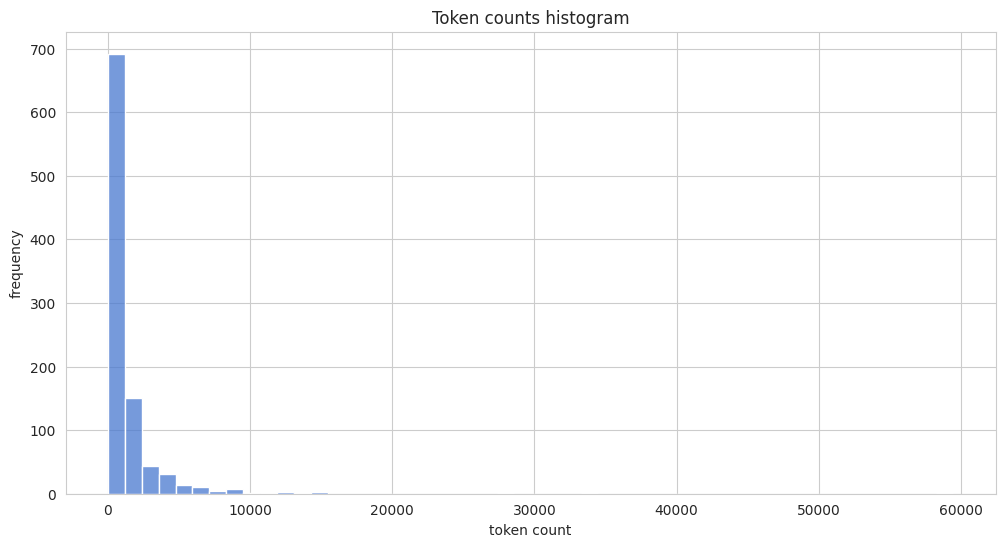

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12,6))
sns.histplot(token_counts, kde = False, bins = 50)

plt.title("Token counts histogram")
plt.xlabel("token count")
plt.ylabel("frequency")

plt.show()

In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 400,
    chunk_overlap = 20,
    length_function = tiktoken_len,
    separators = ['\n\n','\n', ' ', ''] 
)

In [22]:
chunks = text_splitter.split_text(docs[555].page_content)
len(chunks)

6

In [27]:
tiktoken_len(chunks[4])

383

In [31]:
import hashlib
m = hashlib.md5()  # this will convert url into unique id

url = docs[5].metadata['source'].replace('rtdocs/','https://')  #change the url
print(url)

#convert url into unque id
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

https://python.langchain.com/en/latest/reference.html
931668a17e77


In [ ]:
data = [
    {
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': url
    } for i,chunk in enumerate(chunks) 
]
data

Now we apply this to all chunks

In [33]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
  url = doc.metadata['source'].replace('rtdocs/','https://')
  m.update(url.encode('utf-8'))
  uid = m.hexdigest()[:12]
  chunks = text_splitter.split_text(doc.page_content)
  for i,chunk in enumerate(chunks):
    documents.append({
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': url
    })
len(documents)

  0%|          | 0/963 [00:00<?, ?it/s]

4260

Now with all these, we save these all to a jsonl file

In [34]:
import json 

with open('train.jsonl', 'w') as f:
  for doc in documents:
    f.write(json.dumps(doc) + '\n')

Now we can load data from our saved jsonl file

In [35]:
documents2 = []
with open('train.jsonl', 'r') as f:
  for line in f:
    documents2.append(json.loads(line))
len(documents2)

4260

I have uploaded the jsonl file to Hugging face dataset 
Lets use it here 

In [ ]:
!pip install datasets

In [37]:
from datasets import load_dataset

data = load_dataset('pavinithan1998/langchain_python_docs', split='train')
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/pavinithan1998___json/pavinithan1998--langchain_python_docs-59f987c1d97c13e6/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


Dataset({
    features: ['id', 'text', 'source'],
    num_rows: 4260
})